In [1]:
from matplotlib import interactive
interactive(True)

import numpy as np
import matplotlib.pyplot as plt

def Ts(s=1368,a=0.3,e=0.7,g=5.67*10**-8):
    return ((((s*(1-a))/(2*g*(2-e)))**(1/4)))-273.15

In [2]:
Ts(e=1)

29.989668052975446

In [3]:
Ts(e=0.9)

22.851968613447127

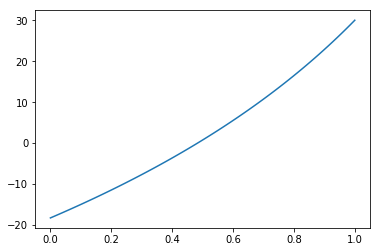

In [4]:
e=np.linspace(0., 1, 70)
plt.plot(e,Ts(e=e))

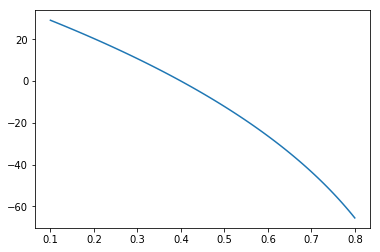

In [5]:
a=np.linspace(0.1, .8, 100)
plt.plot(a,Ts(a=a))

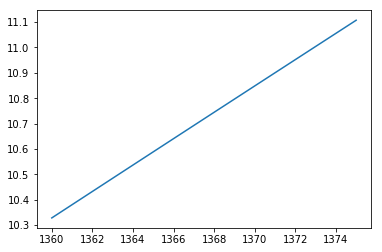

In [6]:
s=np.linspace(1360,1375, 70)
plt.plot(s,Ts(s=s))

In [7]:
saet  = []
for s_ in s:
    for a_ in a:
        for e_ in e:
            saet.append([s_,a_,e_,Ts(s=s_,a=a_,e=e_)])

saet=np.array(saet)        

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
#notebook qt
#inline#
fig=plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')
p = ax.scatter(saet[:,0], saet[:,1],saet[:,2], c=saet[:,3],cmap='viridis')
ax.set_title("temperatura de equilíbrio global média da superfície")
ax.set_ylabel("albedo planetário")
ax.set_zlabel("emissividade de onda longa para a atmosfera")
ax.set_xlabel("constante solar")
cbar=fig.colorbar(p)
cbar.set_label("Ts (c)", labelpad=+1)
plt.show()